# **Regression Project: Boston House Price Prediction**

# **Marks: 60**

Welcome to the project on regression. We will use the **Boston house price dataset** for this project.

-------------------------------
## **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
## **Dataset**
---------------------------

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

## **Importing the necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

#scale the data using Z-score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#algorithms to use
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_curve

#for tuning the model
from sklearn.model_selection import GridSearchCV

#for ignoring warnings
import warnings
warnings.filterwarnings('ignore')




### Loading the dataset

In [2]:
#reading the dataset and pulling it up from google drive
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

# Reading the file
df = pd.read_csv('/content/drive/My Drive/Boston.csv')

df.head()




Mounted at /content/drive


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


## Data Overview

- Observations
- Sanity checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


#there are 506 observation and 13 columns in the data. there is no missing values.

In [4]:
df.shape

(506, 13)

Above also shows the same.

In [5]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
LSTAT      455
MEDV       229
dtype: int64

In [6]:
#finding duplicated values
df.duplicated().sum()

0

No duplicated values.


In [7]:
#getting summary of the data
Summary=df.describe()
Summary

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


Above we can get more understanding of the data; for example the mean proportion of owner-occupied units before 1940 will be 68.6 years. The average room number per dwelling is 6 and the mean full value property tax per $10,000 is 408.24.


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What does the distribution of 'MEDV' look like?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. What are all the inferences that can be found by doing univariate analysis for different variables?
4. Do bivariate analysis to visualize the relationship between the features having significant correlations (>= 0.7 or <= -0.7)

In [ ]:
#Question #1: MEDV is slightly skewed.

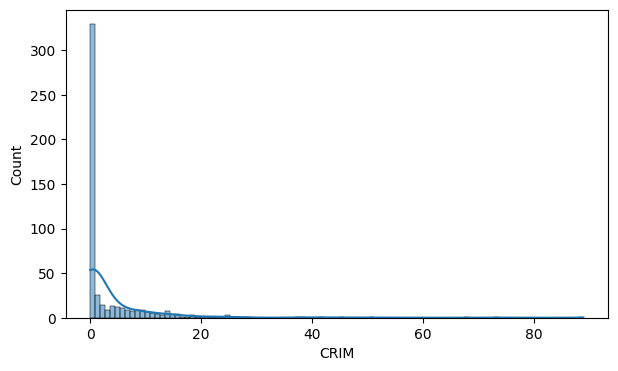

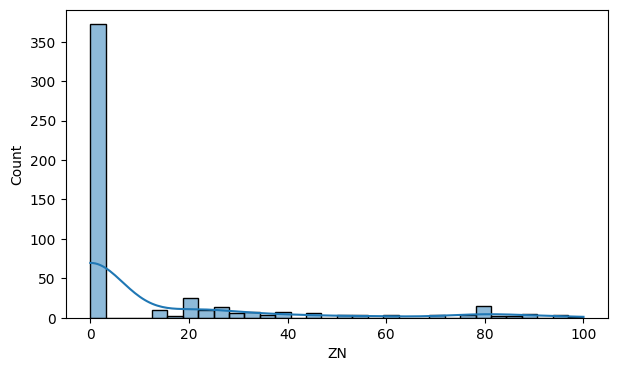

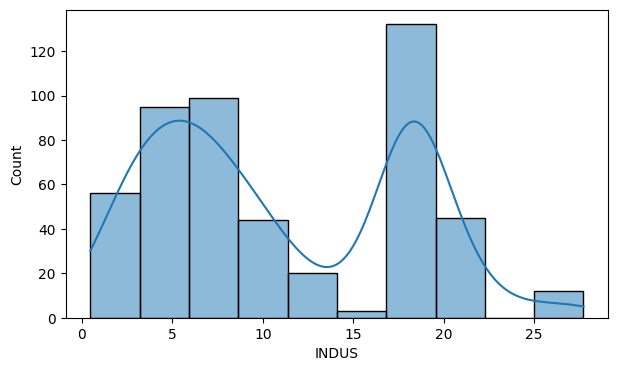

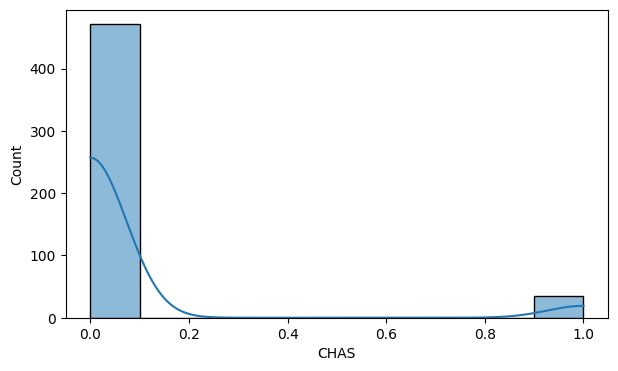

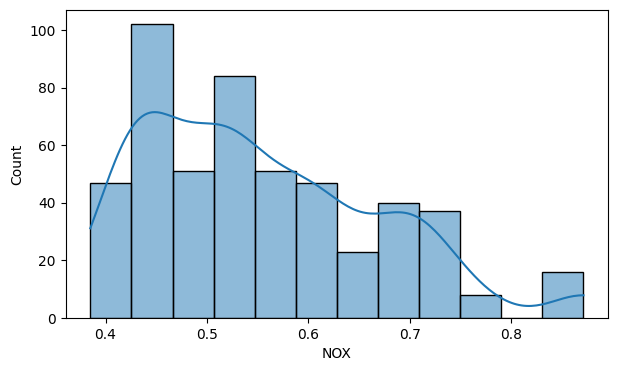

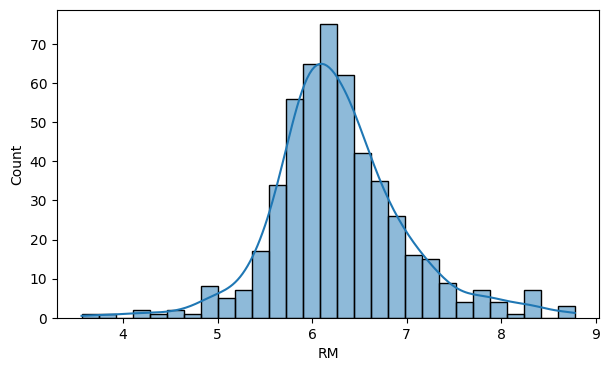

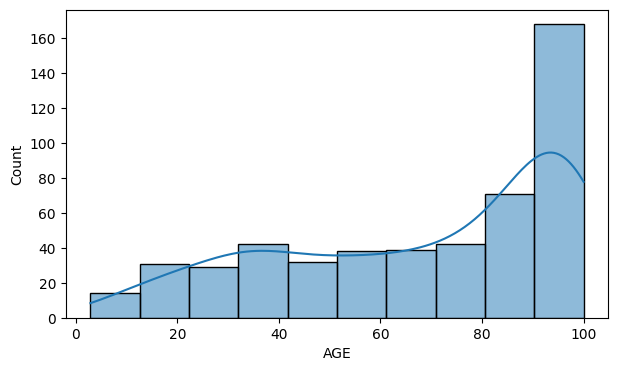

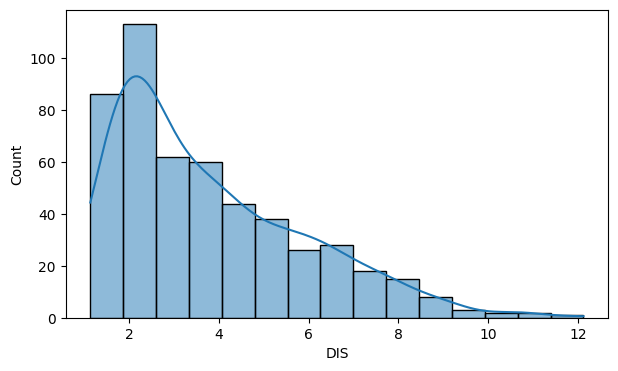

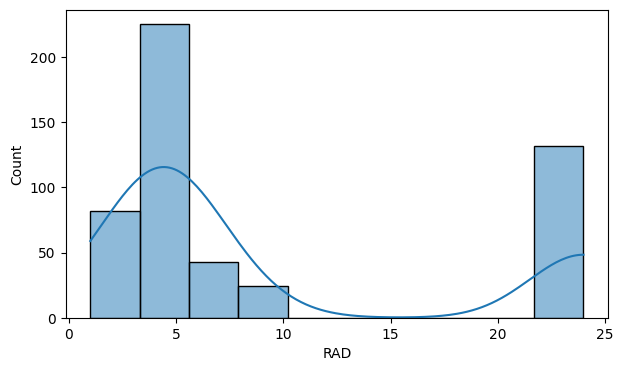

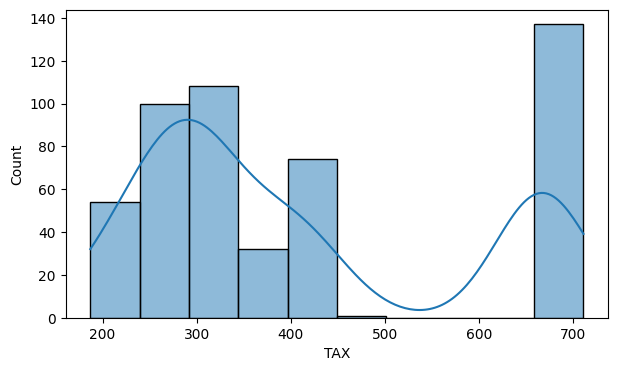

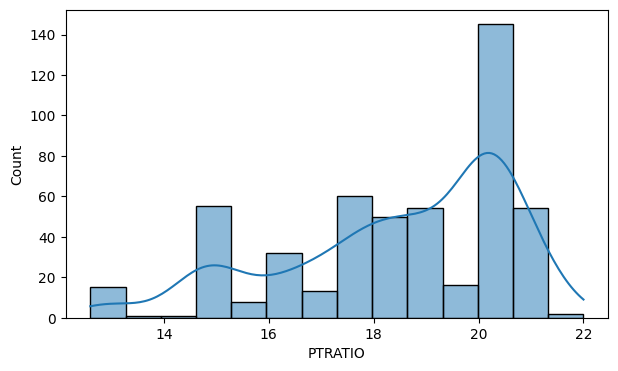

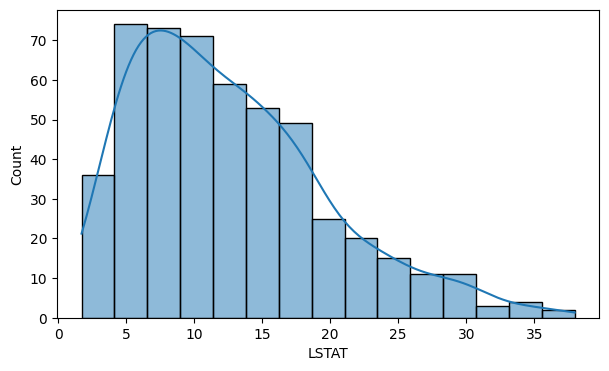

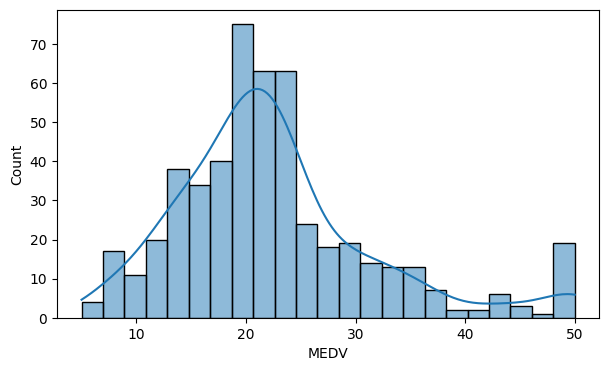

In [8]:
#for answering afromentioned questions, we need to plot
#plotting different variables to see their relationships

for i in df.columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x=i, kde=True)
    plt.show()



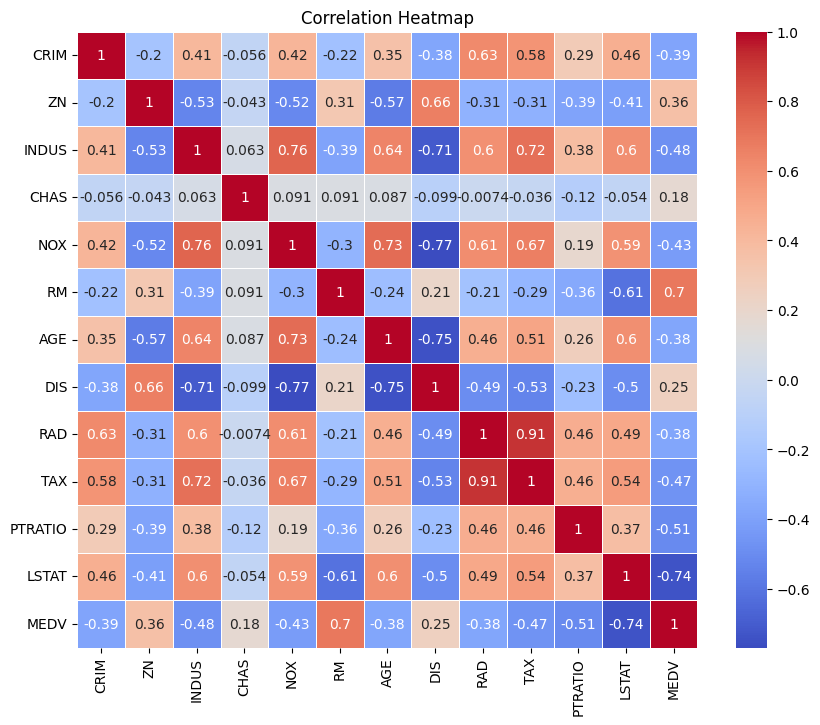

In [9]:
#to answer Q2, I need to write a heatmap code.
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Answering Q2 and Q3: Based on the analysis, there is a positive correlation between crime rates and several factors: lower economic status, a higher proportion of non-retail businesses per town, elevated nitric oxide concentrations, and the age of units built before 1940 that are owner-occupied. Notably, the correlation between crime rates and these factors tends to be stronger when accessibility to radial highways and full-value property taxes are considered.

Conversely, proximity to the Charles River is a strong predictor of lower crime rates, suggesting a negative correlation. Additionally, as the number of rooms in a house increases, along with the median value of owner-occupied houses and the proportion of residential land zones, crime rates tend to decrease.

To directly address the question of whether there is a correlation between the dependent and independent variables: Yes, there is a correlation. Specifically, factors such as lower economic status, the proportion of non-retail businesses, nitric oxide levels, and the age of units can positively impact crime rates and potentially influence housing prices. Conversely, proximity to the Charles River, a higher number of rooms, increased median value of owner-occupied houses, and a larger proportion of residential land zones are associated with lower crime rates and may lead to higher housing prices.

There is a VERY high correlation between TAX and RAD variables that need to be investigated (it might be due to outliers).

There are also strong negative correlations between INDUS and DIS, NOX and DIS, MEDV and LSTAT that should be investigated as well.


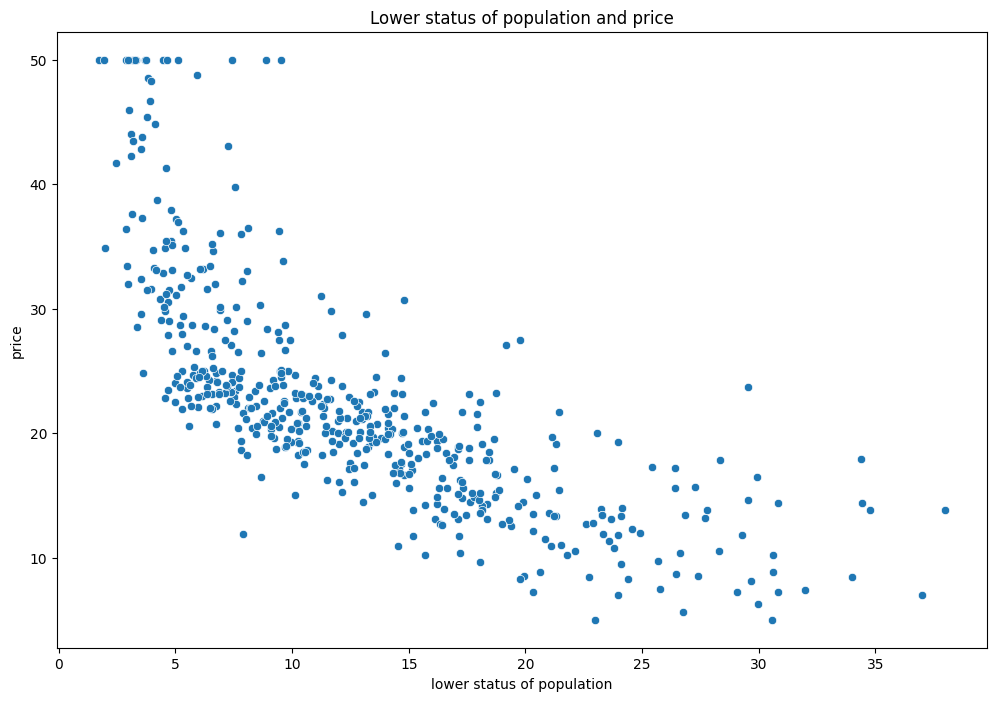

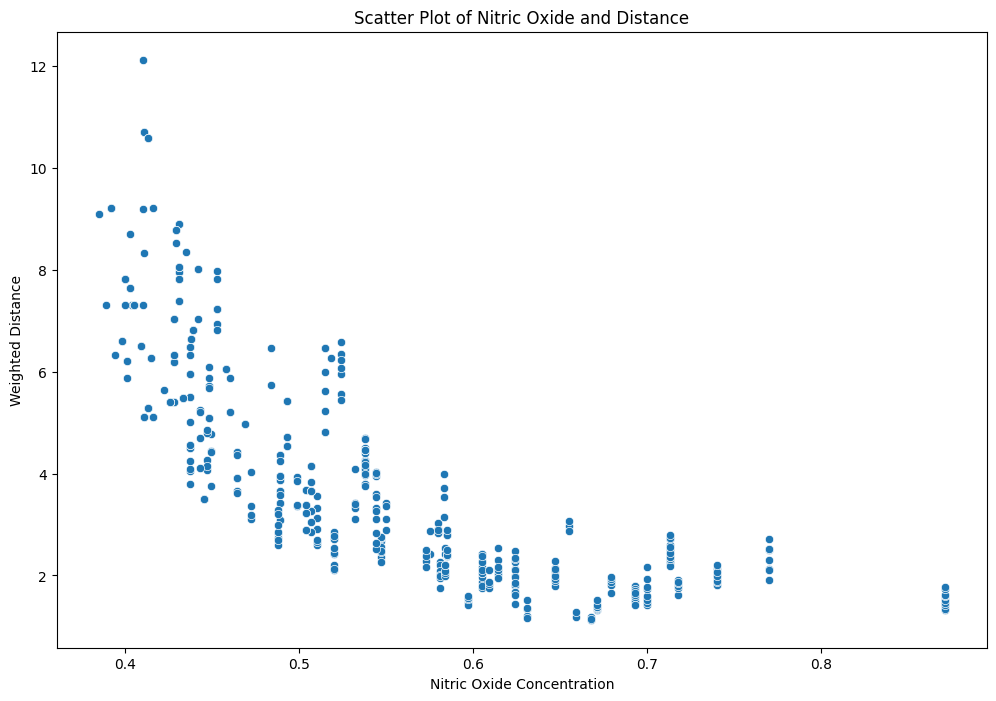

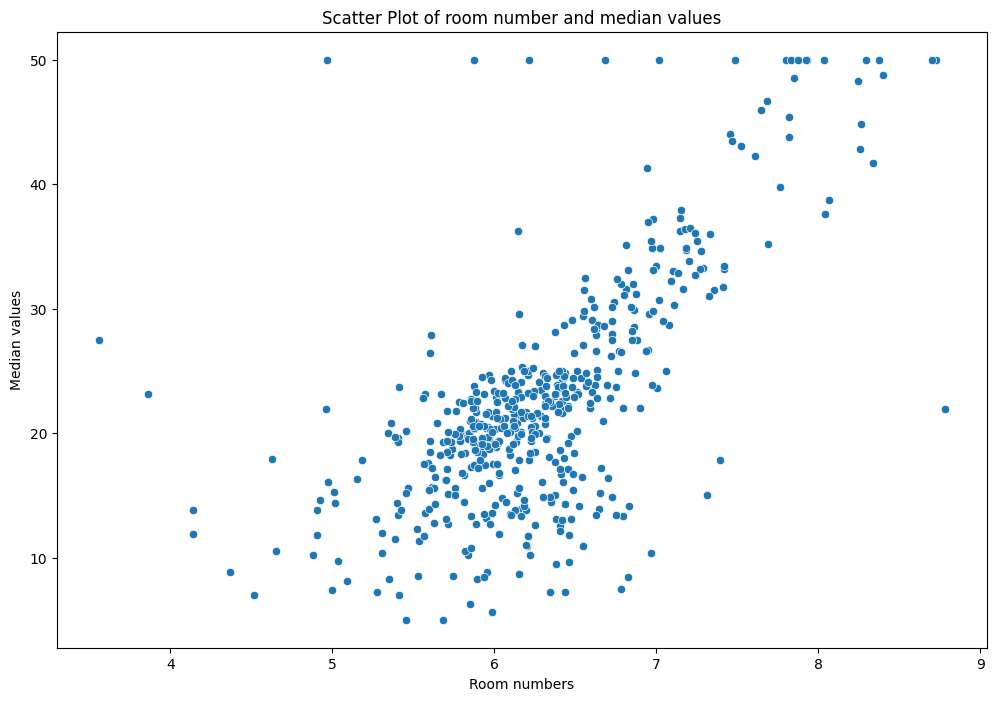

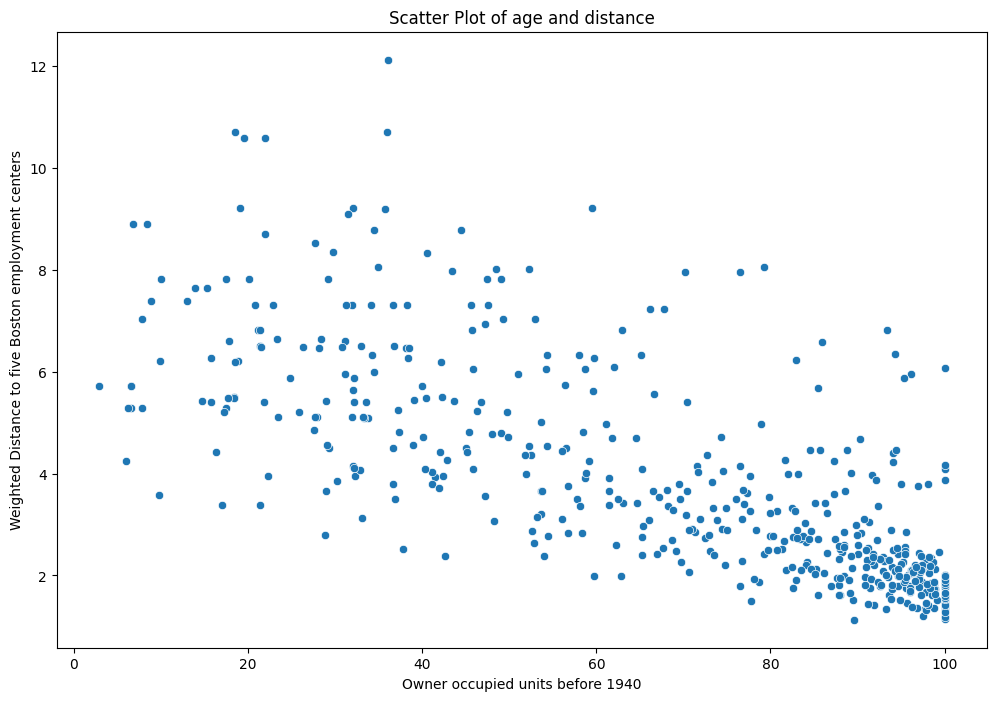

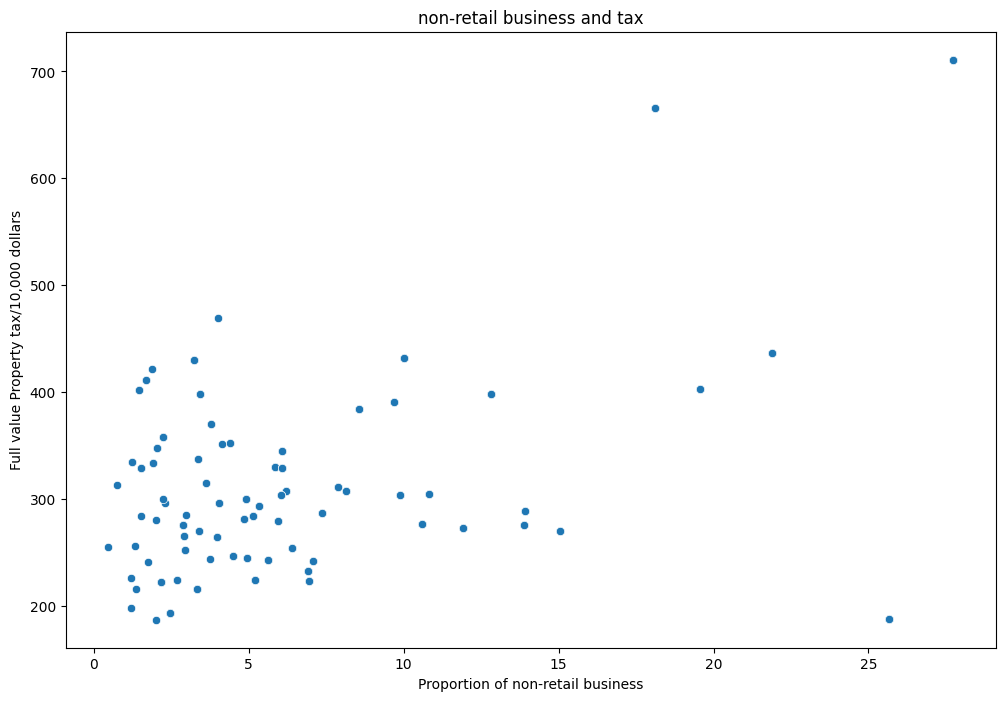

In [10]:
#Q4: doing scatterplot to visualize the relationship between different variables

#for LSTAT and MEDV
plt.figure(figsize=(12, 8))

# Define the color map
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Create scatter plot
sns.scatterplot(data=df, x='LSTAT', y='MEDV', palette=cmap)

# Add labels and title
plt.xlabel('lower status of population')
plt.ylabel('price')
plt.title('Lower status of population and price')

plt.show()


#same for NOX and DIS

plt.figure(figsize=(12, 8))

# Define the color map
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Create scatter plot
sns.scatterplot(data=df, x='NOX', y='DIS', palette=cmap)

# Add labels and title
plt.xlabel('Nitric Oxide Concentration')
plt.ylabel('Weighted Distance')
plt.title('Scatter Plot of Nitric Oxide and Distance')

plt.show()


#same for RM and MEDV

plt.figure(figsize=(12, 8))

# Define the color map
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Create scatter plot
sns.scatterplot(data=df, x='RM', y='MEDV', palette=cmap)

# Add labels and title
plt.xlabel('Room numbers')
plt.ylabel('Median values')
plt.title('Scatter Plot of room number and median values')

plt.show()



#same for AGE and DIS

plt.figure(figsize=(12, 8))

# Define the color map
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Create scatter plot
sns.scatterplot(data=df, x='AGE', y='DIS', palette=cmap)

# Add labels and title
plt.xlabel('Owner occupied units before 1940')
plt.ylabel('Weighted Distance to five Boston employment centers')
plt.title('Scatter Plot of age and distance')

plt.show()

#same for INDUS and TAX
plt.figure(figsize=(12, 8))

# Define the color map
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Create scatter plot
sns.scatterplot(data=df, x='INDUS', y='TAX', palette=cmap)

# Add labels and title
plt.xlabel('Proportion of non-retail business')
plt.ylabel('Full value Property tax/10,000 dollars')
plt.title('non-retail business and tax')

plt.show()


Observations:
Starting with the price and socioeconomic status graph, the price is lower in areas with low socioeconomic status. The highest-priced houses are in areas with fewer people of low socioeconomic status.

Moving to nitric oxide and distance, as nitric oxide concentration increases, the average distance to five Boston employment areas decreases.

Looking at room numbers and median house values, most houses have around six bedrooms, with a median value of $200,000. Generally, as the number of rooms increases, the median value also increases, except for one outlier: a nine-bedroom house with a lower median value.

For age and distance, there is no clear pattern between the age of the units and the distance, suggesting that other factors might influence the relationship. Further investigation, such as grouping variables based on income or neighborhood, might be helpful.

Lastly, the scatterplot of tax and accessibility to radial highways shows that tax is higher in more accessible places.

## Data Preprocessing

- Missing value treatment
- Log transformation of dependent variable if skewed
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

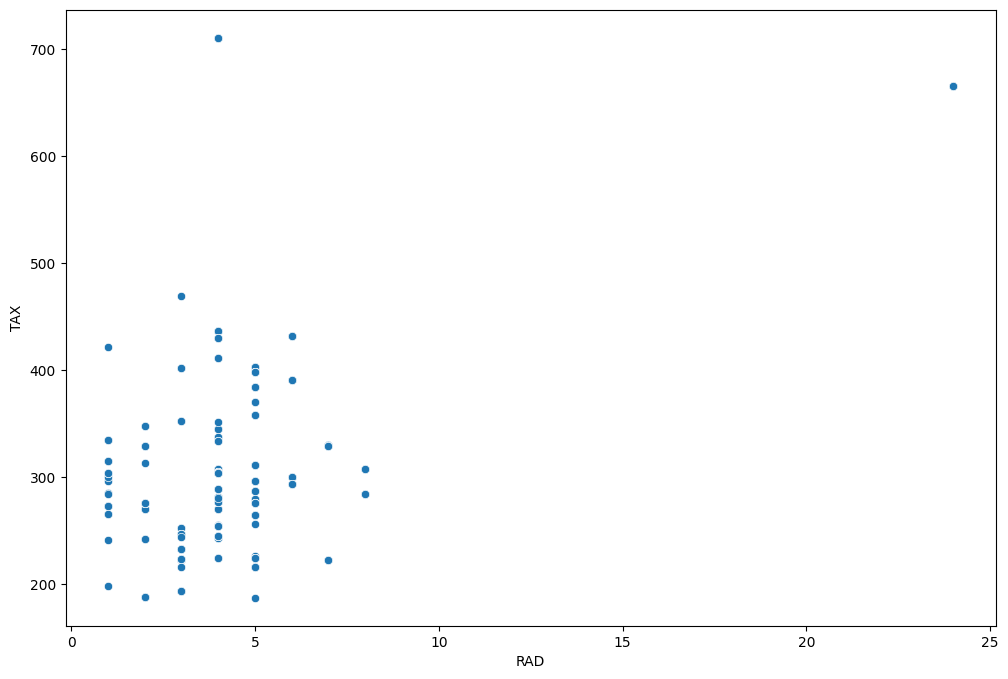

In [11]:
#for data processing I will start with investigating RAD and TAX variables by a scatterplot.

plt.figure(figsize=(12, 8))

sns.scatterplot(x= 'RAD', y= 'TAX', data = df)

plt.show()



In [12]:
#let us remove the outlier to make sure the correlation is real:

# Remove the data corresponding to high tax rate
df1 = df[df['TAX'] < 600]

# Import the required function
from scipy.stats import pearsonr

# Calculate the correlation
print('The correlation between TAX and RAD is', pearsonr(df1['TAX'], df1['RAD'])[0])

The correlation between TAX and RAD is 0.24975731331429196


As we can see after removing the outlier, correlation dropped to 0.24. So there is not a strong positive correlation between tax and rad.

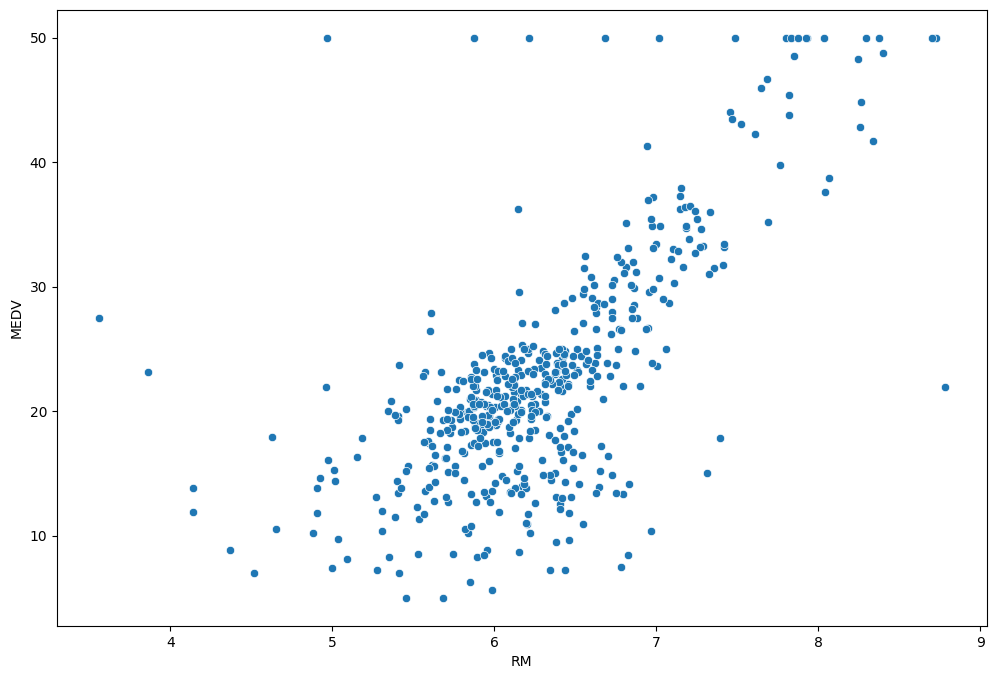

In [13]:
#Since RM and MEDV have high correlation, let us see if there is any outlier.


plt.figure(figsize=(12, 8))

sns.scatterplot(x= 'RM', y= 'MEDV', data = df)

plt.show()

above we see as number of rooms increase, so does the house price which is a given: normally places with more rooms have higher prices.
We can see some outliers here and there, but still we need to capture them. Most of these outliers are in one line and can be captured at number 50.


'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage',
       'Engine', 'Power', 'Seats', 'Log_Price', 'Car_Age'],
      dtype='object')


In [14]:
#let us do the same for RM and MEDV:

# Remove the data corresponding to rooms more than 8:
df1 = df[df['RM'] < 9]

# Import the required function
from scipy.stats import pearsonr

# Calculate the correlation
print('The correlation between RM and MEDV is', pearsonr(df1['RM'], df1['MEDV'])[0])

The correlation between RM and MEDV is 0.6953599470715394


So the correlation is still strong (almost 7), even after dropping the outliers. So we can rely on the results.

again, here we can see outliers at 50. Besides that we can see as the percentage of lower socioeconomic status population is higher, the house price decrease.

In [15]:
missing_values = df.isnull().sum()
print(missing_values)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64


no missing values.


In [16]:
#since dependent variable/MEDV is skewed, let us perform log transformation:

df['MEDV_log'] = np.log(df['MEDV'])

<Axes: xlabel='MEDV_log', ylabel='Count'>

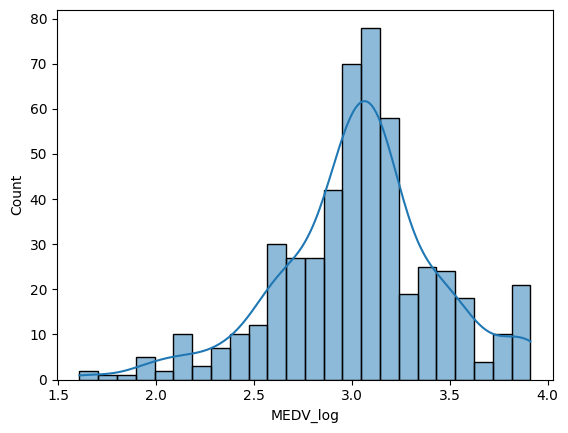

In [17]:
sns.histplot(data = df, x = 'MEDV_log', kde = True)

## Model Building - Linear Regression

before designing our model, we have to split the data in train and test sets. Let us begin:

In [26]:
import statsmodels.api as sm

# Separate the dependent variable and independent variables
Y = df['MEDV_log']

# Drop the columns 'MEDV' and 'MEDV_log' to create the set of independent variables
X = df.drop(columns=['MEDV', 'MEDV_log'])

# Add the intercept term to the set of independent variables
X = sm.add_constant(X)


In [27]:
# splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

## Model Performance Check

1. How does the model is performing? Check using Rsquared, RSME, MAE, MAPE
2. Is there multicollinearity? Check using VIF
3. How does the model is performing after cross validation?

In [28]:
#for answering the above question, let us begin with the assumption of multicullinearity and VIF:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

    feature         VIF
0     const  535.372593
1      CRIM    1.924114
2        ZN    2.743574
3     INDUS    3.999538
4      CHAS    1.076564
5       NOX    4.396157
6        RM    1.860950
7       AGE    3.150170
8       DIS    4.355469
9       RAD    8.345247
10      TAX   10.191941
11  PTRATIO    1.943409
12    LSTAT    2.861881


we can see two variables with high VIF (TAX and RAD). We can remove them one by one and see how it goes.


In [39]:
# Remove TAX and RAD variables
X_train = X_train.drop(['TAX', 'RAD'], axis=1)

print("VIF after removing TAX and RAD:")
print(checking_vif(X_train))

VIF after removing TAX and RAD:
   feature       VIF
0    const  1.008987
1     CRIM  1.426130
2     CHAS  1.049466
3      NOX  2.894213
4       RM  1.671173
5      DIS  2.567306
6  PTRATIO  1.276589
7    LSTAT  2.437089


In [40]:
#one approach might be dropping variables that were not significant (p>0.05): AGE, INDUS, ZN.


import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming df is already defined and contains the necessary columns
# MEDV_log is the log-transformed dependent variable

# Define Y and X
Y = df['MEDV_log']
X = df.drop(columns=['MEDV', 'MEDV_log', 'AGE', 'INDUS', 'ZN'])

# Remove TAX and RAD variables from X
X = X.drop(columns=['TAX', 'RAD'])
X = sm.add_constant(X)  # Add constant term for the intercept

# Split the data into train and test sets (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create and fit the model
KingRmit = sm.OLS(y_train, X_train).fit()
print(KingRmit.summary())

# Predict on the test set
y_pred_log = KingRmit.predict(X_test)

# Retransform the predictions to the original scale
y_pred = np.exp(y_pred_log)
y_test_original = np.exp(y_test)

# Compare predictions to actual values
results = pd.DataFrame({'Actual': y_test_original, 'Predicted': y_pred})
print(results)

# Evaluate the model
mse = np.mean((y_test_original - y_pred) ** 2)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")




                            OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     153.9
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          3.21e-102
Time:                        16:31:27   Log-Likelihood:                 67.888
No. Observations:                 354   AIC:                            -119.8
Df Residuals:                     346   BIC:                            -88.82
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2486      0.223     19.054      0.0

The R-squared value of 0.75 means that our model explains 75% of the variation in the log of median house values using the independent variables we included. This high value indicates that our model fits the data well, and the Adjusted R-squared further supports this.

The large F-statistic shows that at least one of our independent variables is significantly related to the median house values, suggesting that the model is useful.

Our model identifies several important factors affecting median house values. Specifically:

Crime Rate: Higher crime rates are associated with lower median house values.
Proximity to the Charles River: Being closer to the Charles River is linked to higher house values.
Nitric Oxide Concentration: Higher levels of nitric oxide are associated with lower house values. This factor has a particularly strong effect.
Average Number of Rooms: More rooms are generally associated with higher house values.
Distance from Boston Employment Centers: Greater distances are linked to lower house values.
Pupil-Teacher Ratio: A higher pupil-teacher ratio is associated with lower house values.
Lower Socioeconomic Status: Areas with lower socioeconomic status have lower house values.
In summary, the model shows that crime rates, nitric oxide levels, distance from employment centers, pupil-teacher ratios, and lower socioeconomic status contribute to lower median house values. On the other hand, proximity to the Charles River and having more rooms per dwelling are associated with higher house values.



In [45]:
#another approach might be recentring the intercept

import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming df is already defined and contains the necessary columns
# MEDV_log is the log-transformed dependent variable

# Define Y and X
Y = df['MEDV_log']
X = df.drop(columns=['MEDV', 'MEDV_log', 'AGE', 'INDUS', 'ZN'])

# Remove TAX and RAD variables from X
X = X.drop(columns=['TAX', 'RAD'])

# Center the predictor variables
X_centered = X - X.mean()

# Add constant term for the intercept
X_centered = sm.add_constant(X_centered)

# Split the data into train and test sets (70:30)
X_train, X_test, y_train, y_test = train_test_split(X_centered, Y, test_size=0.30, random_state=1)

# Create and fit the model
KingRmit = sm.OLS(y_train, X_train).fit()
print(KingRmit.summary())

# Predict on the test set
y_pred_log = KingRmit.predict(X_test)

# Retransform the predictions to the original scale
y_pred = np.exp(y_pred_log)
y_test_original = np.exp(y_test)

# Compare predictions to actual values
results = pd.DataFrame({'Actual': y_test_original, 'Predicted': y_pred})
print(results)

# Evaluate the model
mse = np.mean((y_test_original - y_pred) ** 2)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


                            OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     153.9
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          3.21e-102
Time:                        16:45:02   Log-Likelihood:                 67.888
No. Observations:                 354   AIC:                            -119.8
Df Residuals:                     346   BIC:                            -88.82
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0398      0.011    281.812      0.0

I cannot see much of difference in recentring intercept, so it seems we are good to go.


we need to check these elements to make sure our model is strong:
Checking the below linear regression assumptions

1- Mean of residuals should be 0
2- No Heteroscedasticity
3- Linearity of variables
4- Normality of error terms

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.
We can now create a linear regression model as all independent variables seems to be promising.

In [46]:
# Create and fit the model
Kingrmit = sm.OLS(y_train, X_train).fit()
print(Kingrmit.summary())

# Make predictions on the test set
y_pred = Kingrmit.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Compute the mean of the residuals
mean_residuals = np.mean(residuals)

print(f"Mean of residuals: {mean_residuals}")

                            OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     153.9
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          3.21e-102
Time:                        16:54:17   Log-Likelihood:                 67.888
No. Observations:                 354   AIC:                            -119.8
Df Residuals:                     346   BIC:                            -88.82
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0398      0.011    281.812      0.0

given this mean of residuals, it seems my prediction is a bit lower than the actual value but can be unbiased and close to actual variable.

In [47]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [48]:


# Fit the model
Kingrmit = sm.OLS(y_train, X_train).fit()

# Perform the Goldfeld-Quandt test
# The function requires the endogenous variable (y_train) and the exogenous variables (X_train) as inputs
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(y_train, X_train)

# Zip the results with the names and print
print(list(zip(name, test)))

[('F statistic', 1.1188001500111222), ('p-value', 0.2331844249732384)]


Since the p value is higher than 0.05, we can see the model supports the validity of homoschedasity assumption.

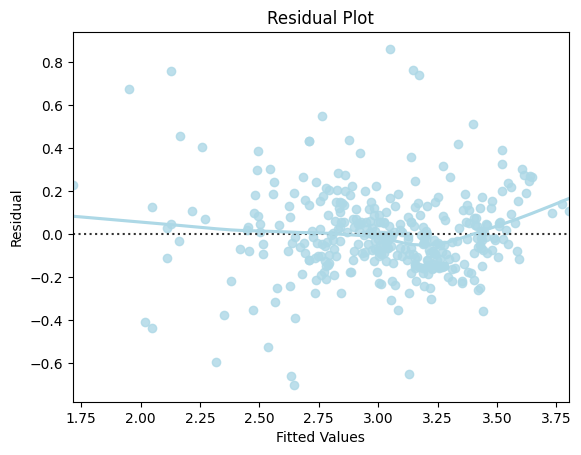

In [49]:
#checking the linearity of data

import seaborn as sns
import matplotlib.pyplot as plt

# Predicted values and residuals from the KingRmit model
fitted = Kingrmit.fittedvalues
residuals = Kingrmit.resid

# Create the residual plot
sns.residplot(x=fitted, y=residuals, color="lightblue", lowess=True)

plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()


As we can see above the residuals are random and do not have a clear patterns so we can say it meets the assumption of linearity.

## Final Model

In [50]:
import numpy as np
import pandas as pd

# RMSE (Root Mean Squared Error)
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())

# MAPE (Mean Absolute Percentage Error)
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions) / targets)) * 100

# MAE (Mean Absolute Error)
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))

# Model Performance on train and test data
def model_pref(olsmodel, x_train, x_test, y_train, y_test):

    # Predictions on train and test data
    y_pred_train_log = olsmodel.predict(x_train)
    y_pred_test_log = olsmodel.predict(x_test)

    # Retransform predictions and actual values if the model used log transformation
    y_pred_train = np.exp(y_pred_train_log)
    y_pred_test = np.exp(y_pred_test_log)
    y_observed_train = np.exp(y_train)
    y_observed_test = np.exp(y_test)

    # Create DataFrame with performance metrics
    performance_df = pd.DataFrame(
        {
            "Data": ["Train", "Test"],
            "RMSE": [
                rmse(y_pred_train, y_observed_train),
                rmse(y_pred_test, y_observed_test),
            ],
            "MAE": [
                mae(y_pred_train, y_observed_train),
                mae(y_pred_test, y_observed_test),
            ],
            "MAPE": [
                mape(y_pred_train, y_observed_train),
                mape(y_pred_test, y_observed_test),
            ],
        }
    )

    print(performance_df)

# Checking model performance
model_pref(KingRmit, X_train, X_test, y_train, y_test)



    Data      RMSE       MAE       MAPE
0  Train  4.734983  3.098417  14.272931
1   Test  4.535119  3.279741  14.976017


we can see only small negligble differences between trained and test data sets suggesting our model can be applicable on actual variables and has high power in predicting the unseen data.

In [51]:
#we will do cross-validation to make sure this is the best model that can predict the unseen data:

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Create the Linear Regression model
linearregression = LinearRegression()

# Cross-validate the model with R^2 scoring
cv_r2_scores = cross_val_score(linearregression, X_train, y_train, cv=10)

# Cross-validate the model with Mean Squared Error (MSE) scoring
cv_mse_scores = cross_val_score(linearregression, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Print the results
print("R^2: %0.3f (+/- %0.3f)" % (cv_r2_scores.mean(), cv_r2_scores.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-cv_mse_scores.mean(), cv_mse_scores.std() * 2))


R^2: 0.717 (+/- 0.281)
Mean Squared Error: 0.042 (+/- 0.029)


it seems the model is able to predict 71% of the actual values.
The average squared error also is relatively low.

## Actionable Insights and Recommendations

Actionable Insights and Observations
Model Performance:
R-squared Value: The model explains 75% of the variation in the log of median house values, indicating a strong fit to the data. The high R-squared and the adjusted R-squared value reinforce that the model is well-calibrated.
Cross-Validation Accuracy: With a 71% accuracy on unseen data, the model performs reasonably well in predicting new data, although there is room for improvement.
Significant Factors Influencing Median House Values:
Crime Rate: Reducing crime rates could lead to lower house values. Efforts to improve safety and reduce crime in neighborhoods might boost property values.
Proximity to the Charles River: Properties closer to the Charles River have higher values. This suggests that enhancing accessibility to desirable locations or waterfront areas could increase property values.
Nitric Oxide Concentration: High levels of nitric oxide are associated with lower house values. Initiatives to improve air quality and reduce pollution could positively impact property values.
Average Number of Rooms: Increasing the number of rooms in a property tends to raise its value. Investing in property expansions or renovations to add more rooms could be beneficial.
Distance from Boston Employment Centers: Properties further from employment centers have lower values. Improving transportation links or focusing on development near key employment hubs could increase property values.
Pupil-Teacher Ratio: Higher pupil-teacher ratios correlate with lower house values. Enhancing educational facilities and reducing classroom sizes might positively affect property values.
Lower Socioeconomic Status: Areas with lower socioeconomic status tend to have lower house values. Community development programs aimed at improving economic conditions could help increase property values.
Summary:
Strategic Investments: Focus on improving factors negatively impacting house values such as crime rates, pollution, and socioeconomic status. Conversely, leverage factors positively affecting values, like proximity to desirable locations and property features (e.g., more rooms).
Urban Planning and Development: Enhance access to employment centers and improve educational and environmental conditions to boost property values.
Ongoing Monitoring: Regularly evaluate and refine the model to maintain accuracy and address evolving market conditions.
These insights can guide policy-making, investment decisions, and community development strategies to enhance property values and overall market performance.-


___